---
### ML Practise
#### Date: 2026-01-30

---
Task 1. EDA

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('AB_NYC_2019.csv')

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df['neighbourhood_group'].value_counts(normalize=True)

neighbourhood_group
Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: proportion, dtype: float64

In [9]:
# df['neighbourhood'].unique()

In [6]:
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [7]:
df['price'].min(), df['price'].max()

(0, 10000)

In [8]:
df[df['price'] == 0].shape

(11, 16)

<Axes: xlabel='price', ylabel='Count'>

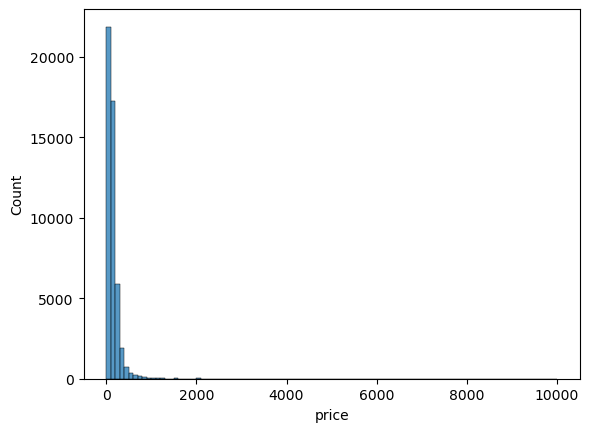

In [9]:
import seaborn as sns
sns.histplot(df['price'], bins=100)

In [10]:
df[df['price'] > 2000].shape

(86, 16)

In [11]:
df[df['price'] < 10].shape

(11, 16)

In [12]:
df['availability_365'].min(), df['availability_365'].max() 

(0, 365)

In [13]:
df.tail(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [14]:
df.sample(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
36711,29181179,Charming Studio Apartment at East Harlem.,37736307,Rafael,Manhattan,East Harlem,40.78731,-73.94889,Private room,110,2,8,2019-06-30,0.95,2,14
17324,13676601,Here's a great offer on a spacious furnished r...,79598330,Nesha,Brooklyn,East Flatbush,40.66337,-73.92576,Private room,30,3,20,2018-03-31,0.54,1,27


In [19]:
df.shape

(48895, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [24]:
df = df[(df['price']>10) & (df['price']<2000)]

<Axes: xlabel='neighbourhood_group', ylabel='price'>

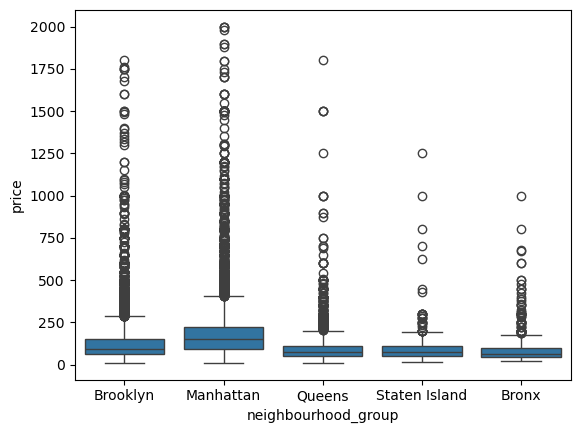

In [25]:
sns.boxplot(x='neighbourhood_group', y='price', data = df)

<Axes: xlabel='room_type', ylabel='price'>

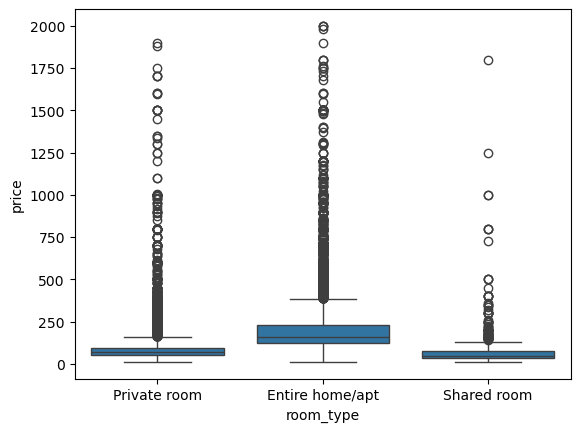

In [26]:
sns.boxplot(x='room_type', y='price', data = df)

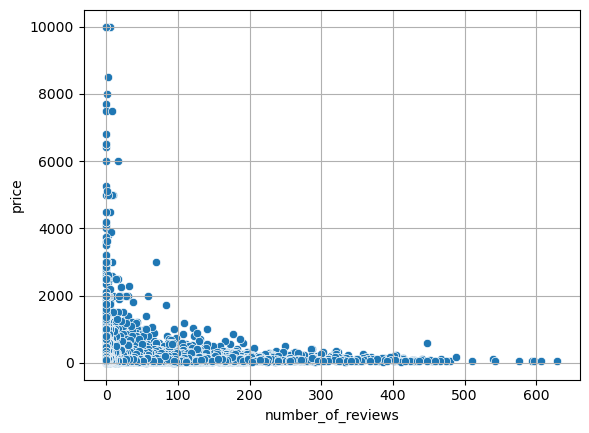

In [35]:
sns.scatterplot(x='number_of_reviews', y = 'price', data = df )
plt.grid()

<Axes: >

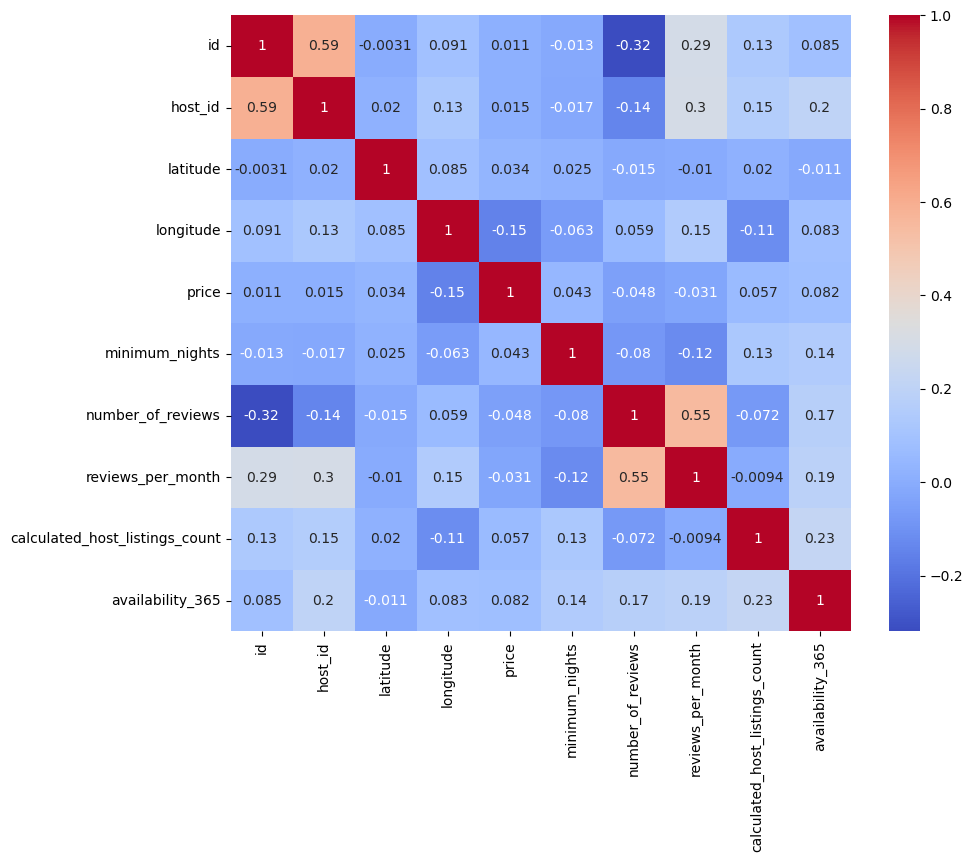

In [36]:
corr = df.corr(numeric_only=True)

plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap = 'coolwarm' , annot=True)


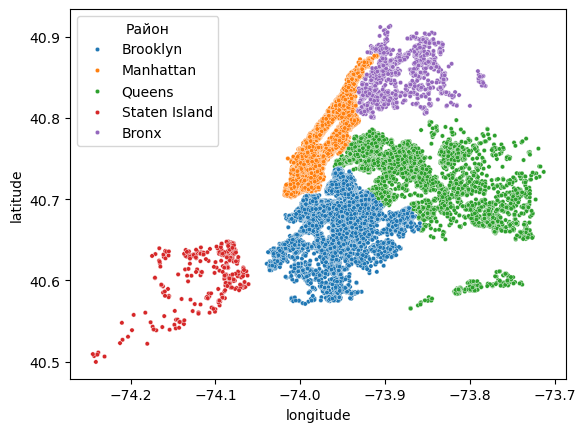

In [45]:
# grafik

sns.scatterplot(x='longitude', y= 'latitude', data = df, hue= 'neighbourhood_group', s = 10)
plt.legend(title ='Район')

---
Task 2. Preprocessing 

In [9]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [11]:
df_copy = df.copy()

df_copy.dropna().shape, df.shape

((38821, 16), (48895, 16))

In [12]:
df_copy.drop_duplicates().shape, df.shape

((48895, 16), (48895, 16))

In [15]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [16]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [17]:
df['days_since_last_review'] = (pd.Timestamp('today') - df['last_review']).dt.days

In [18]:
df['days_since_last_review'].fillna(999)

0        2660.0
1        2446.0
2         999.0
3        2401.0
4        2629.0
          ...  
48890     999.0
48891     999.0
48892     999.0
48893     999.0
48894     999.0
Name: days_since_last_review, Length: 48895, dtype: float64

---
Task 3. Train test split *optinal create pipeline 

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(columns= ['id', 'name', 'host_name', 'price', 'host_id', 'last_review'])
y = df['price']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


---
Creating ML-model

In [20]:
import pandas as pd 
import numpy as np

import seaborn as sns
from matplotlib import pyplot

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [21]:
num_cols = X.select_dtypes(include=["float64","int64"]).columns
cat_cols = X.select_dtypes(include=["object","category"]).columns

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])


In [22]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Pipeline([
    ("preprocess", preprocess),
    ("model", Ridge(alpha=1.0))
])

ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)

print("Ridge MAE:", mean_absolute_error(y_test, pred_ridge))
print("Ridge R2:", r2_score(y_test, pred_ridge))

Ridge MAE: 84.36896945232691
Ridge R2: 0.038328354162930456


In [24]:
from sklearn.linear_model import Lasso

lasso = Pipeline([
    ("preprocess", preprocess),
    ("model", Lasso(alpha=0.05, max_iter=10000))
])

lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)

print("LASSO MAE:", mean_absolute_error(y_test, pred_lasso))

LASSO MAE: 84.35827676672528


In [25]:
from sklearn.svm import SVR

svr = Pipeline([
    ("preprocess", preprocess),
    ("model", SVR(kernel="rbf", C=10, epsilon=0.1))
])

svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)

print("SVR MAE:", mean_absolute_error(y_test, pred_svr))

SVR MAE: 67.85715292727076


In [26]:
rf = RandomForestClassifier(
    n_jobs = -1,
    n_estimators=100,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_r = rf.predict(X_test)

print("ExtraTrees MAE:", mean_absolute_error(y_test, y_pred_r))

ExtraTrees MAE: 67.68964106759383


In [27]:
from sklearn.ensemble import ExtraTreesRegressor

et = Pipeline([
    ("preprocess", preprocess),
    ("model", ExtraTreesRegressor(n_estimators=400, random_state=42))
])

et.fit(X_train, y_train)
pred_et = et.predict(X_test)

print("ExtraTrees MAE:", mean_absolute_error(y_test, pred_et))

ExtraTrees MAE: 74.85711448000819


In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = Pipeline([
    ("preprocess", preprocess),
    ("model", GradientBoostingRegressor(
        learning_rate=0.05,
        n_estimators=400,
        max_depth=5
    ))
])

gbr.fit(X_train, y_train)
pred_gbr = gbr.predict(X_test)

print("GBR MAE:", mean_absolute_error(y_test, pred_gbr))

GBR MAE: 74.35516562699931


---
Task 5. Fine-tunning model

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    "n_estimators": [100, 200, 250, 300],
    "max_depth": [None, 5, 10],
    "min_samples_leaf": [1, 3, 5, 7, 10]
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid.fit(X_train, y_train)

grid.best_params_